In [ ]:
# 튜토리얼 진행을 위한 모듈 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import warnings

np.set_printoptions(suppress=True, precision=3)

# 경고 메시지 출력 표기 생략
warnings.filterwarnings('ignore')

# 회귀 (regression)

회귀 분석(regression analysis)은 관찰된 연속형 변수들에 대해 두 변수 사이의 모형을 구한뒤 적합도를 측정해 내는 분석 방법입니다.

하나의 종속변수와 하나의 독립변수 사이의 관계를 분석할 경우를 **단순회귀분석(simple regression analysis)**, 하나의 종속변수와 여러 독립변수 사이의 관계를 규명하고자 할 경우를 **다중회귀분석(multiple regression analysis)**이라고 합니다.

**예시**
- 주택 가격 예측
- 매출액 예측
- 주가 예측
- 온도 예측

대표적인 회귀 모델로는

- 최소제곱법(Ordinary Least Squares)을 활용한 **LinearRegression**
- 경사하강법(Gradient Descent)을 활용한 **SGDRegressor**
- 선형 회귀 모델에 L1, L2 규제를 더한 **Lasso, Ridge, ElasticNet**

등이 있습니다.

[도큐먼트](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)

## 회귀 모델을 위한 평가 지표

In [ ]:
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    np.random.seed(123)
    x = np.arange(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise
    plt.figure(figsize=(10, 7))
    plt.plot(x, y, color='r', label=f'y = {w}*x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, y, yy

In [ ]:
x, y_true, y_pred = make_linear(size=50, w=1.5, b=0.8, noise=5.5)

### R2 Score (결정계수)

- 통계학 회귀분석에서 자주 쓰이는 회귀 평가 지표.
- 실제 값의 분산 대비 예측 값의 분산 비율을 나타냅니다.
- 1에 가까울 수록 좋은 모델, 0에 가까울 수록 나쁨, **음수가 나오면 잘못 평가** 되었음을 의미합니다.

$\Large R^{2}= 1-\frac{\sum_{i=1}^{n}{(y_i - \hat{y_i})^2}}{\sum_{i=1}^{n}(y_i - \bar{y})^2}$

Python 코드로 위의 수식을 그대로 구현합니다.

`r2`에 결과를 대입합니다.

In [ ]:
# 코드를 입력해 주세요
r2 = 

In [ ]:
# 코드검증
print('r2 score = {:.3f}'.format(r2))

<p><strong>[출력 결과]</strong></p><pre>r2 score = 0.986
</pre>

`sklearn.metrics`패키지에 `r2_score`로 구현

In [ ]:
from sklearn.metrics import r2_score

`r2_` 변수에 결과를 대입합니다.

In [ ]:
# 코드를 입력해 주세요
r2_ = 

In [ ]:
# 코드검증
print('r2 score = {:.3f}'.format(r2_))

<p><strong>[출력 결과]</strong></p><pre>r2 score = 0.986
</pre>

### MSE (Mean Squared Error)

- 예측 값과 실제 값의 차이에 대한 **제곱**에 대하여 평균을 낸 값
- MSE 오차가 작으면 작을수록 좋지만, 과대적합이 될 수 있음에 주의합니다.
- 예측 값과 실제 값보다 크게 예측이 되는지 작게 예측되는지 알 수 없습니다.

$\Large MSE = \frac{1}{n}\sum_{i=1}^{n}{(y_i - \hat{y_i})^2}$

Python 코드로 위의 수식을 그대로 구현합니다.

`mse` 변수에 결과를 대입합니다.

In [ ]:
# 코드를 입력해 주세요
mse = 

In [ ]:
# 코드검증
print('mse = {:.3f}'.format(mse))

<p><strong>[출력 결과]</strong></p><pre>mse = 6.540
</pre>

`sklearn.metrics` 패키지에 `mean_squared_error`를 활용합니다.

In [ ]:
from sklearn.metrics import mean_squared_error

`mse_` 변수에 결과를 대입합니다.

In [ ]:
# 코드를 입력해 주세요
mse_ = 

In [ ]:
# 코드검증
print('mse = {:.3f}'.format(mse_))

<p><strong>[출력 결과]</strong></p><pre>mse = 6.540
</pre>

### MAE (Mean Absolute Error)

- 예측값과 실제값의 차이에 대한 **절대값**에 대하여 평균을 낸 값
- 실제 값과 예측 값 차이를 절대 값으로 변환해 평균을 계산합니다. 작을수록 좋지만, 과대적합이 될 수 있음에 주의합니다.
- **스케일에 의존적**입니다.

예를 들어, 아파트 집값은 10억, 20억으로 구성되어 있고, 과일 가격은 5000원, 10000원으로 구성되어 있을때,

예측하는 각각 모델의 MSE 가 똑같이 100 이 나왔다고 가정한다며,동일한 오차율이 아님에도 불구하고 동일하게 평가되어 지는 현상이 발생합니다.
이는 MSE 오차에서도 마찬가지 입니다.

$\Large MAE = \frac{1}{n}\sum_{i=1}^{n}{|(y_i - \hat{y_i})|}$

Python 코드로 위의 수식을 그대로 구현합니다.

`mae` 변수에 결과를 대입합니다.

In [ ]:
# 코드를 입력해 주세요
mae = 

In [ ]:
# 코드검증
print('mae = {:.3f}'.format(mae))

<p><strong>[출력 결과]</strong></p><pre>mae = 2.084
</pre>

`sklearn.metrics` 패키지에 `mean_absolute_error`를 활용합니다.

In [ ]:
from sklearn.metrics import mean_absolute_error

`mae_` 변수에 결과를 대입합니다.

In [ ]:
# 코드를 입력해 주세요
mae_ = 

In [ ]:
# 코드검증
print('mae = {:.3f}'.format(mae_))

<p><strong>[출력 결과]</strong></p><pre>mae = 2.084
</pre>

### RMSE (Root Mean Squared Error)

$\Large RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}{(y_i - \hat{y_i})^2}}$

- 예측값과 실제값의 차이에 대한 **제곱**에 대하여 평균을 낸 뒤 **루트**를 씌운 값
- MSE의 장단점을 거의 그대로 따라갑니다.
- 제곱 오차에 대한 왜곡을 줄여줍니다.

Python 코드로 위의 수식을 그대로 구현합니다.

`rmse` 변수에 결과를 대입합니다.

In [ ]:
# 코드를 입력해 주세요
rmse = 

In [ ]:
print('mse = {:.3f}, rmse = {:.3f}'.format(mse, rmse))

`sklearn.metrics` 패키지에는 별도로 **RMSE 평가지표는 없습니다.**

## 회귀 모델 (Regression Models)

### 모델별 성능 확인을 위한 함수

In [ ]:
# 모듈 설치
!pip install teddynote -q

In [ ]:
from teddynote import utils

# 그래프 사이즈 설정
utils.set_plot_options(figsize=(12, 10))

# MSE 에러 설정
utils.set_plot_error('mse')

### 보스턴 집 값 데이터

**데이터 로드 (load_boston)**

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
# 코드를 입력해 주세요
data = 

data['data']에는 X 데이터, data['feature_names']에는 컬럼 명입니다.

In [ ]:
# 코드를 입력해 주세요
df = 


target 데이터도 Column 에 추가 합니다.

In [ ]:
# 코드검증
df.head()

<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>CRIM</th>
      <th>ZN</th>
      <th>INDUS</th>
      <th>CHAS</th>
      <th>NOX</th>
      <th>RM</th>
      <th>AGE</th>
      <th>DIS</th>
      <th>RAD</th>
      <th>TAX</th>
      <th>PTRATIO</th>
      <th>B</th>
      <th>LSTAT</th>
      <th>target</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0.00632</td>
      <td>18.0</td>
      <td>2.31</td>
      <td>0.0</td>
      <td>0.538</td>
      <td>6.575</td>
      <td>65.2</td>
      <td>4.0900</td>
      <td>1.0</td>
      <td>296.0</td>
      <td>15.3</td>
      <td>396.90</td>
      <td>4.98</td>
      <td>24.0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.02731</td>
      <td>0.0</td>
      <td>7.07</td>
      <td>0.0</td>
      <td>0.469</td>
      <td>6.421</td>
      <td>78.9</td>
      <td>4.9671</td>
      <td>2.0</td>
      <td>242.0</td>
      <td>17.8</td>
      <td>396.90</td>
      <td>9.14</td>
      <td>21.6</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.02729</td>
      <td>0.0</td>
      <td>7.07</td>
      <td>0.0</td>
      <td>0.469</td>
      <td>7.185</td>
      <td>61.1</td>
      <td>4.9671</td>
      <td>2.0</td>
      <td>242.0</td>
      <td>17.8</td>
      <td>392.83</td>
      <td>4.03</td>
      <td>34.7</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.03237</td>
      <td>0.0</td>
      <td>2.18</td>
      <td>0.0</td>
      <td>0.458</td>
      <td>6.998</td>
      <td>45.8</td>
      <td>6.0622</td>
      <td>3.0</td>
      <td>222.0</td>
      <td>18.7</td>
      <td>394.63</td>
      <td>2.94</td>
      <td>33.4</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0.06905</td>
      <td>0.0</td>
      <td>2.18</td>
      <td>0.0</td>
      <td>0.458</td>
      <td>7.147</td>
      <td>54.2</td>
      <td>6.0622</td>
      <td>3.0</td>
      <td>222.0</td>
      <td>18.7</td>
      <td>396.90</td>
      <td>5.33</td>
      <td>36.2</td>
    </tr>
  </tbody>
</table>
</div>

**컬럼 소개**

속성 수 : 13

* **CRIM**: 자치시 별 범죄율
* **ZN**: 25,000 평방 피트를 초과하는 주거용 토지의 비율
* **INDUS**: 비소매(non-retail) 비즈니스 토지 비율
* **CHAS**: 찰스 강과 인접한 경우에 대한 더비 변수 (1= 인접, 0= 인접하지 않음)
* **NOX**: 산화 질소 농도 (10ppm)
* **RM**:주택당 평균 객실 수
* **AGE**: 1940 년 이전에 건축된 자가소유 점유 비율
* **DIS**: 5 개의 보스턴 고용 센터까지의 가중 거리     
* **RAD**: 고속도로 접근성 지수
* **TAX**: 10,000 달러 당 전체 가치 재산 세율
* **PTRATIO**  도시별 학생-교사 비율
* **B**: 인구당 흑인의 비율. 1000(Bk - 0.63)^2, (Bk는 흑인의 비율을 뜻함)
* **LSTAT**: 하위 계층의 비율
* **target**: 자가 주택의 중앙값 (1,000 달러 단위)

**학습(train) / 테스트(test)** 용 데이터를 분할 합니다.

In [ ]:
from sklearn.model_selection import train_test_split

# 시드 설정
SEED=30

In [ ]:
# 코드를 입력해 주세요
x_train, x_test, y_train, y_test = 

`x_train`, `x_test`의 shape를 출력합니다.

In [ ]:
# 코드를 입력해 주세요


<p><strong>[출력 결과]</strong></p><pre>((379, 13), (127, 13))</pre>

In [ ]:
# 검증코드
x_train.head()

<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>CRIM</th>
      <th>ZN</th>
      <th>INDUS</th>
      <th>CHAS</th>
      <th>NOX</th>
      <th>RM</th>
      <th>AGE</th>
      <th>DIS</th>
      <th>RAD</th>
      <th>TAX</th>
      <th>PTRATIO</th>
      <th>B</th>
      <th>LSTAT</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>142</th>
      <td>3.32105</td>
      <td>0.0</td>
      <td>19.58</td>
      <td>1.0</td>
      <td>0.871</td>
      <td>5.403</td>
      <td>100.0</td>
      <td>1.3216</td>
      <td>5.0</td>
      <td>403.0</td>
      <td>14.7</td>
      <td>396.90</td>
      <td>26.82</td>
    </tr>
    <tr>
      <th>10</th>
      <td>0.22489</td>
      <td>12.5</td>
      <td>7.87</td>
      <td>0.0</td>
      <td>0.524</td>
      <td>6.377</td>
      <td>94.3</td>
      <td>6.3467</td>
      <td>5.0</td>
      <td>311.0</td>
      <td>15.2</td>
      <td>392.52</td>
      <td>20.45</td>
    </tr>
    <tr>
      <th>393</th>
      <td>8.64476</td>
      <td>0.0</td>
      <td>18.10</td>
      <td>0.0</td>
      <td>0.693</td>
      <td>6.193</td>
      <td>92.6</td>
      <td>1.7912</td>
      <td>24.0</td>
      <td>666.0</td>
      <td>20.2</td>
      <td>396.90</td>
      <td>15.17</td>
    </tr>
    <tr>
      <th>162</th>
      <td>1.83377</td>
      <td>0.0</td>
      <td>19.58</td>
      <td>1.0</td>
      <td>0.605</td>
      <td>7.802</td>
      <td>98.2</td>
      <td>2.0407</td>
      <td>5.0</td>
      <td>403.0</td>
      <td>14.7</td>
      <td>389.61</td>
      <td>1.92</td>
    </tr>
    <tr>
      <th>363</th>
      <td>4.22239</td>
      <td>0.0</td>
      <td>18.10</td>
      <td>1.0</td>
      <td>0.770</td>
      <td>5.803</td>
      <td>89.0</td>
      <td>1.9047</td>
      <td>24.0</td>
      <td>666.0</td>
      <td>20.2</td>
      <td>353.04</td>
      <td>14.64</td>
    </tr>
  </tbody>
</table>
</div>

## LinearRegression

[도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# 코드를 입력해 주세요
model = 

In [ ]:
# 코드를 입력해 주세요
model.

<p><strong>[출력 결과]</strong></p><pre>LinearRegression()</pre>

`pred` 변수에 예측 결과를 대입합니다.

In [ ]:
# 코드를 입력해 주세요
pred = 

In [ ]:
utils.plot_error('LinearRegression', y_test, pred)

## 규제 (Regularization)

학습이 과대적합 되는 것을 방지하고자 일종의 **penalty**를 부여하는 것

**L2 규제 (L2 Regularization)**

* 각 가중치 제곱의 합에 규제 강도(Regularization Strength) α를 곱한다. 
* α를 크게 하면 가중치가 더 많이 감소되고(규제를 중요시함), α를 작게 하면 가중치가 증가한다(규제를 중요시하지 않음).

**L1 규제 (L1 Regularization)**

* 가중치의 제곱의 합이 아닌 **가중치의 합**을 더한 값에 규제 강도(Regularization Strength) α를 곱하여 오차에 더한다. 
* 어떤 가중치(w)는 실제로 0이 된다. 즉, 모델에서 완전히 제외되는 특성이 생기는 것이다. 


**L2 규제가 L1 규제에 비해 더 안정적이라 일반적으로는 L2규제가 더 많이 사용된다**

### Ridge (L2 Regularization)

- L2 규제 계수를 적용합니다. 
- 선형회귀에 가중치 (weight)들의 제곱합에 대한 최소화를 추가합니다.

**주요 hyperparameter**
- `alpha`: 규제 계수

**수식**

`α`는 규제 계수(강도)를 의미합니다.

$\Large Error=MSE+α\sum_{i=1}^{n}{w_i^2}$ 

In [ ]:
from sklearn.linear_model import Ridge

**규제 계수(alpha)**를 정의합니다.

In [ ]:
# 값이 커질 수록 큰 규제입니다.
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

In [ ]:
for alpha in alphas:
    # 코드를 입력해 주세요
    ridge = 
    ridge.
    pred = 
    utils.add_error('Ridge(alpha={})'.format(alpha), y_test, pred)
utils.plot_all()

<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>model</th>
      <th>error</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Ridge(alpha=100)</td>
      <td>18.018382</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Ridge(alpha=10)</td>
      <td>17.068408</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Ridge(alpha=1)</td>
      <td>16.652412</td>
    </tr>
    <tr>
      <th>3</th>
      <td>LinearRegression</td>
      <td>16.485165</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Ridge(alpha=0.0001)</td>
      <td>16.485151</td>
    </tr>
    <tr>
      <th>5</th>
      <td>Ridge(alpha=0.001)</td>
      <td>16.485020</td>
    </tr>
    <tr>
      <th>6</th>
      <td>Ridge(alpha=0.01)</td>
      <td>16.483801</td>
    </tr>
    <tr>
      <th>7</th>
      <td>Ridge(alpha=0.1)</td>
      <td>16.479483</td>
    </tr>
  </tbody>
</table>
</div>

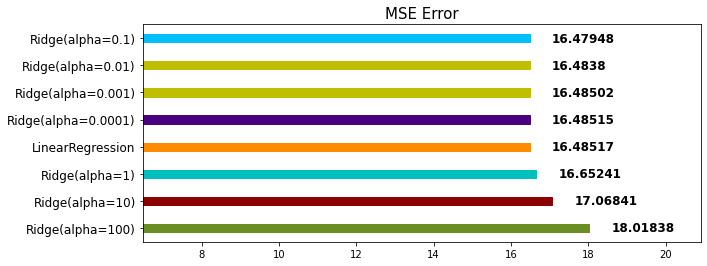

coef_는 **feature의 가중치**를 보여줍니다.

가중치(weight)를 토대로 회귀 예측시 어떤 feature가 주요하게 영향을 미쳤는지 보여 줍니다.

<p><strong>[출력 결과]</strong></p><pre><Figure size 720x288 with 1 Axes></pre>

In [ ]:
x_train.columns

In [ ]:
ridge.coef_

**DataFrame**으로 feature별 가중치를 시각화 합니다.

In [ ]:
# 코드를 입력해 주세요


<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>features</th>
      <th>importances</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>4</th>
      <td>NOX</td>
      <td>-18.012494</td>
    </tr>
    <tr>
      <th>7</th>
      <td>DIS</td>
      <td>-1.529399</td>
    </tr>
    <tr>
      <th>10</th>
      <td>PTRATIO</td>
      <td>-0.957246</td>
    </tr>
    <tr>
      <th>12</th>
      <td>LSTAT</td>
      <td>-0.557350</td>
    </tr>
    <tr>
      <th>0</th>
      <td>CRIM</td>
      <td>-0.114736</td>
    </tr>
    <tr>
      <th>9</th>
      <td>TAX</td>
      <td>-0.013134</td>
    </tr>
    <tr>
      <th>2</th>
      <td>INDUS</td>
      <td>-0.002879</td>
    </tr>
    <tr>
      <th>6</th>
      <td>AGE</td>
      <td>0.004546</td>
    </tr>
    <tr>
      <th>11</th>
      <td>B</td>
      <td>0.006369</td>
    </tr>
    <tr>
      <th>1</th>
      <td>ZN</td>
      <td>0.040452</td>
    </tr>
    <tr>
      <th>8</th>
      <td>RAD</td>
      <td>0.324793</td>
    </tr>
    <tr>
      <th>3</th>
      <td>CHAS</td>
      <td>3.486692</td>
    </tr>
    <tr>
      <th>5</th>
      <td>RM</td>
      <td>3.728917</td>
    </tr>
  </tbody>
</table>
</div>

In [ ]:
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

In [ ]:
plot_coef(x_train.columns, ridge.coef_)

이번에는, **alpha 값에 따른 coef 의 차이**를 확인해 봅시다

In [ ]:
ridge_100 = Ridge(alpha=100)
ridge_100.fit(x_train, y_train)
ridge_pred_100 = ridge_100.predict(x_test)

ridge_001 = Ridge(alpha=0.001)
ridge_001.fit(x_train, y_train)
ridge_pred_001 = ridge_001.predict(x_test)

In [ ]:
plot_coef(x_train.columns, ridge_100.coef_)

In [ ]:
plot_coef(x_train.columns, ridge_001.coef_)

### Lasso (L1 Regularization)

Lasso(Least Absolute Shrinkage and Selection Operator)

- 선형 회귀에 L1 규제 계수를 적용합니다.
- 가중치(weight)의 절대 값의 합을 최소화 하는 계수를 추가 합니다.
- 불필요한 회귀 계수를 급격히 감소, 0으로 만들어 제거합니다.
- 특성(Feature) 선택에 유리합니다.

**주요 hyperparameter**
- `alpha`: L1 규제 계수

**수식**  

`α`는 규제 계수(강도)를 의미합니다.

$\Large Error=MSE+α\sum_{i=1}^{n}{|w_i|}$

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
# 값이 커질 수록 큰 규제입니다.
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

In [ ]:
for alpha in alphas:
    # 코드를 입력해 주세요
    lasso = 
    lasso.
    pred = 
    utils.add_error('Lasso(alpha={})'.format(alpha), y_test, pred)
utils.plot_all()

<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>model</th>
      <th>error</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Lasso(alpha=100)</td>
      <td>48.725206</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Lasso(alpha=10)</td>
      <td>27.146245</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Lasso(alpha=1)</td>
      <td>19.882302</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Ridge(alpha=100)</td>
      <td>18.018382</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Lasso(alpha=0.1)</td>
      <td>17.083615</td>
    </tr>
    <tr>
      <th>5</th>
      <td>Ridge(alpha=10)</td>
      <td>17.068408</td>
    </tr>
    <tr>
      <th>6</th>
      <td>Ridge(alpha=1)</td>
      <td>16.652412</td>
    </tr>
    <tr>
      <th>7</th>
      <td>LinearRegression</td>
      <td>16.485165</td>
    </tr>
    <tr>
      <th>8</th>
      <td>Ridge(alpha=0.0001)</td>
      <td>16.485151</td>
    </tr>
    <tr>
      <th>9</th>
      <td>Ridge(alpha=0.001)</td>
      <td>16.485020</td>
    </tr>
    <tr>
      <th>10</th>
      <td>Lasso(alpha=0.0001)</td>
      <td>16.484261</td>
    </tr>
    <tr>
      <th>11</th>
      <td>Ridge(alpha=0.01)</td>
      <td>16.483801</td>
    </tr>
    <tr>
      <th>12</th>
      <td>Ridge(alpha=0.1)</td>
      <td>16.479483</td>
    </tr>
    <tr>
      <th>13</th>
      <td>Lasso(alpha=0.001)</td>
      <td>16.476551</td>
    </tr>
    <tr>
      <th>14</th>
      <td>Lasso(alpha=0.01)</td>
      <td>16.441822</td>
    </tr>
  </tbody>
</table>
</div>

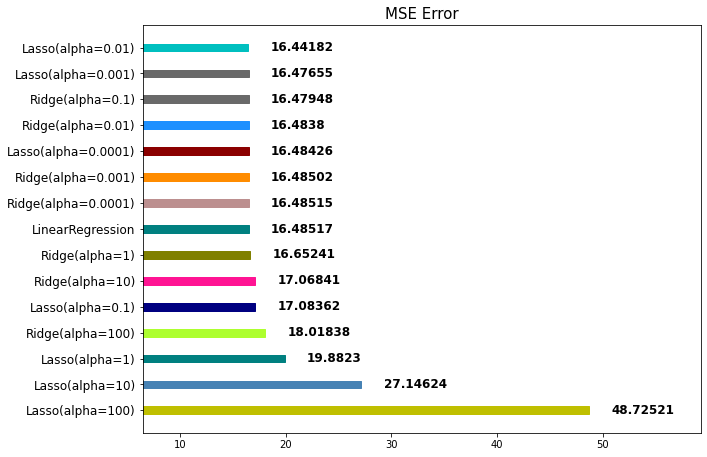

In [ ]:
lasso_100 = Lasso(alpha=100)
lasso_100.fit(x_train, y_train)
lasso_pred_100 = lasso_100.predict(x_test)

lasso_001 = Lasso(alpha=0.001)
lasso_001.fit(x_train, y_train)
lasso_pred_001 = lasso_001.predict(x_test)

<p><strong>[출력 결과]</strong></p><pre><Figure size 720x540 with 1 Axes></pre>

In [ ]:
plot_coef(x_train.columns, lasso_001.coef_)

In [ ]:
lasso_001.coef_

Lasso 모델에 너무 큰 alpha 계수를 적용하면 **대부분의 feature들의 가중치가 0으로 수렴**합니다.

In [ ]:
plot_coef(x_train.columns, lasso_100.coef_)

In [ ]:
lasso_100.coef_

### ElasticNet

Elastic Net 회귀모형은 **가중치의 절대값의 합(L1)과 제곱합(L2)을 동시에** 제약 조건으로 가지는 모형입니다.

In [ ]:
Image(url='https://miro.medium.com/max/1312/1*j_DDK7LbVrejTq0tfmavAA.png', width=500)

**주요 hyperparameter**

`alpha`: 규제 계수

`l1_ratio (default=0.5)`

- l1_ratio = 0 (L2 규제만 사용). 
- l1_ratio = 1 (L1 규제만 사용). 
- 0 < l1_ratio < 1 (L1 and L2 규제의 혼합사용)

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
alpha=0.01
ratios = [0.2, 0.5, 0.8]

In [ ]:
for ratio in ratios:
    # 코드를 입력해 주세요
    elasticnet = 
    elasticnet.
    pred = 
    utils.add_error('ElasticNet(l1_ratio={})'.format(ratio), y_test, pred)
utils.plot_all()

<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>model</th>
      <th>error</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Lasso(alpha=100)</td>
      <td>48.725206</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Lasso(alpha=10)</td>
      <td>27.146245</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Lasso(alpha=1)</td>
      <td>19.882302</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Ridge(alpha=100)</td>
      <td>18.018382</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Lasso(alpha=0.1)</td>
      <td>17.083615</td>
    </tr>
    <tr>
      <th>5</th>
      <td>Ridge(alpha=10)</td>
      <td>17.068408</td>
    </tr>
    <tr>
      <th>6</th>
      <td>ElasticNet(l1_ratio=0.2)</td>
      <td>16.914638</td>
    </tr>
    <tr>
      <th>7</th>
      <td>ElasticNet(l1_ratio=0.5)</td>
      <td>16.822431</td>
    </tr>
    <tr>
      <th>8</th>
      <td>Ridge(alpha=1)</td>
      <td>16.652412</td>
    </tr>
    <tr>
      <th>9</th>
      <td>ElasticNet(l1_ratio=0.8)</td>
      <td>16.638817</td>
    </tr>
    <tr>
      <th>10</th>
      <td>LinearRegression</td>
      <td>16.485165</td>
    </tr>
    <tr>
      <th>11</th>
      <td>Ridge(alpha=0.0001)</td>
      <td>16.485151</td>
    </tr>
    <tr>
      <th>12</th>
      <td>Ridge(alpha=0.001)</td>
      <td>16.485020</td>
    </tr>
    <tr>
      <th>13</th>
      <td>Lasso(alpha=0.0001)</td>
      <td>16.484261</td>
    </tr>
    <tr>
      <th>14</th>
      <td>Ridge(alpha=0.01)</td>
      <td>16.483801</td>
    </tr>
    <tr>
      <th>15</th>
      <td>Ridge(alpha=0.1)</td>
      <td>16.479483</td>
    </tr>
    <tr>
      <th>16</th>
      <td>Lasso(alpha=0.001)</td>
      <td>16.476551</td>
    </tr>
    <tr>
      <th>17</th>
      <td>Lasso(alpha=0.01)</td>
      <td>16.441822</td>
    </tr>
  </tbody>
</table>
</div>

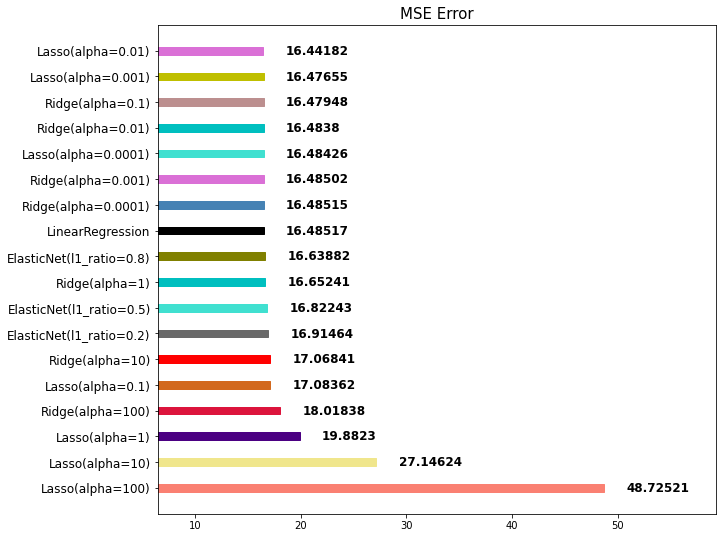

In [ ]:
elsticnet_20 = ElasticNet(alpha=5, l1_ratio=0.2)
elsticnet_20.fit(x_train, y_train)
elasticnet_pred_20 = elsticnet_20.predict(x_test)

elsticnet_80 = ElasticNet(alpha=5, l1_ratio=0.8)
elsticnet_80.fit(x_train, y_train)
elasticnet_pred_80 = elsticnet_80.predict(x_test)

<p><strong>[출력 결과]</strong></p><pre><Figure size 720x648 with 1 Axes></pre>

In [ ]:
plot_coef(x_train.columns, elsticnet_20.coef_)

In [ ]:
plot_coef(x_train.columns, elsticnet_80.coef_)

## Scaler 적용

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### MinMaxScaler (정규화)

정규화 (Normalization)도 표준화와 마찬가지로 데이터의 스케일을 조정합니다.

정규화가 표준화와 다른 가장 큰 특징은 **모든 데이터가 0 ~ 1 사이의 값**을 가집니다.

즉, 최대값은 1, 최소값은 0으로 데이터의 범위를 조정합니다.

**min값과 max값을 0~1사이로 정규화**

In [ ]:
# 코드를 입력해 주세요
minmax_scaler = 
minmax_scaled = 

In [ ]:
# 코드검증
round(pd.DataFrame(minmax_scaled).describe(), 2)

<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>0</th>
      <th>1</th>
      <th>2</th>
      <th>3</th>
      <th>4</th>
      <th>5</th>
      <th>6</th>
      <th>7</th>
      <th>8</th>
      <th>9</th>
      <th>10</th>
      <th>11</th>
      <th>12</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>count</th>
      <td>379.00</td>
      <td>379.00</td>
      <td>379.00</td>
      <td>379.00</td>
      <td>379.00</td>
      <td>379.00</td>
      <td>379.00</td>
      <td>379.00</td>
      <td>379.00</td>
      <td>379.00</td>
      <td>379.00</td>
      <td>379.00</td>
      <td>379.00</td>
    </tr>
    <tr>
      <th>mean</th>
      <td>0.04</td>
      <td>0.12</td>
      <td>0.38</td>
      <td>0.07</td>
      <td>0.34</td>
      <td>0.52</td>
      <td>0.66</td>
      <td>0.28</td>
      <td>0.37</td>
      <td>0.42</td>
      <td>0.62</td>
      <td>0.90</td>
      <td>0.31</td>
    </tr>
    <tr>
      <th>std</th>
      <td>0.11</td>
      <td>0.24</td>
      <td>0.25</td>
      <td>0.25</td>
      <td>0.24</td>
      <td>0.14</td>
      <td>0.30</td>
      <td>0.22</td>
      <td>0.38</td>
      <td>0.32</td>
      <td>0.23</td>
      <td>0.23</td>
      <td>0.20</td>
    </tr>
    <tr>
      <th>min</th>
      <td>0.00</td>
      <td>0.00</td>
      <td>0.00</td>
      <td>0.00</td>
      <td>0.00</td>
      <td>0.00</td>
      <td>0.00</td>
      <td>0.00</td>
      <td>0.00</td>
      <td>0.00</td>
      <td>0.00</td>
      <td>0.00</td>
      <td>0.00</td>
    </tr>
    <tr>
      <th>25%</th>
      <td>0.00</td>
      <td>0.00</td>
      <td>0.16</td>
      <td>0.00</td>
      <td>0.12</td>
      <td>0.45</td>
      <td>0.40</td>
      <td>0.10</td>
      <td>0.13</td>
      <td>0.17</td>
      <td>0.46</td>
      <td>0.95</td>
      <td>0.14</td>
    </tr>
    <tr>
      <th>50%</th>
      <td>0.00</td>
      <td>0.00</td>
      <td>0.29</td>
      <td>0.00</td>
      <td>0.31</td>
      <td>0.51</td>
      <td>0.76</td>
      <td>0.22</td>
      <td>0.17</td>
      <td>0.27</td>
      <td>0.69</td>
      <td>0.99</td>
      <td>0.27</td>
    </tr>
    <tr>
      <th>75%</th>
      <td>0.04</td>
      <td>0.20</td>
      <td>0.64</td>
      <td>0.00</td>
      <td>0.49</td>
      <td>0.59</td>
      <td>0.93</td>
      <td>0.43</td>
      <td>1.00</td>
      <td>0.91</td>
      <td>0.81</td>
      <td>1.00</td>
      <td>0.44</td>
    </tr>
    <tr>
      <th>max</th>
      <td>1.00</td>
      <td>1.00</td>
      <td>1.00</td>
      <td>1.00</td>
      <td>1.00</td>
      <td>1.00</td>
      <td>1.00</td>
      <td>1.00</td>
      <td>1.00</td>
      <td>1.00</td>
      <td>1.00</td>
      <td>1.00</td>
      <td>1.00</td>
    </tr>
  </tbody>
</table>
</div>

### StandardScaler (표준화)

표준화는 데이터의 **평균을 0 분산 및 표준편차를 1**로 만들어 줍니다.

**표준화를 하는 이유**

- 서로 **다른 통계 데이터들을 비교하기 용이**하기 때문입니다.
- 표준화를 하면 평균은 0, 분산과 표준편차는 1로 만들어 데이터의 **분포를 단순화 시키고, 비교를 용이**하게 합니다.

$\Large z = \frac{(X - \mu)}{\sigma}$

In [ ]:
# 코드를 입력해 주세요
std_scaler = 
std_scaled = 

In [ ]:
round(pd.DataFrame(std_scaled).describe(), 2)

## 파이프라인 (pipeline)

scikit-learn의 **전처리(pre-processing)용 모듈과 모델의 학습 기능을 파이프라인으로 합칠 수** 있습니다.

- 파이프라인으로 결합된 모형은 원래의 모형이 가지는 `fit`, `predict` 함수를 가집니다.
- 파이프라인에 정의된 순서에 따라 전처리 모듈이 먼저 호출되어 전처리 과정을 거친 후 모델이 학습하게 됩니다.

[Pipeline 공식 도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)

In [ ]:
from sklearn.pipeline import make_pipeline

- `MinMaxScaler`를 적용
- ElasticNet, `alpha=0.1`, `l1_ratio=0.2` 적용

In [ ]:
# 코드를 입력해 주세요
pipeline = make_pipeline(
    
    
)

In [ ]:
# 코드를 입력해 주세요
pipeline.
pipeline_pred = 

In [ ]:
utils.plot_error('MinMax ElasticNet', y_test, pipeline_pred)

- `StandardScaler`를 적용
- ElasticNet, `alpha=0.1`, `l1_ratio=0.2` 적용

In [ ]:
# 코드를 입력해 주세요
pipeline = make_pipeline(
    
    
)

In [ ]:
# 코드를 입력해 주세요
pipeline.
pipeline_pred = 

In [ ]:
utils.plot_error('Standard ElasticNet', y_test, pipeline_pred)

### Polynomial Features

다항식의 계수간 상호작용을 통해 **새로운 feature를 생성**합니다.

예를들면, [a, b] 2개의 feature가 존재한다고 가정하고,

degree=2로 설정한다면, polynomial features 는 [1, a, b, a^2, ab, b^2] 가 됩니다.

**주의**
- `degree`를 올리면, 기하급수적으로 많은 feature 들이 생겨나며, 학습 데이터에 지나치게 과대적합 될 수 있습니다.

**주요 hyperparameter**

- `degree`: 차수
- `include_bias`: 1로 채운 컬럼 추가 여부

[Polynomial Features 도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=poly%20feature#sklearn.preprocessing.PolynomialFeatures)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
x = np.arange(5).reshape(-1, 1)
x

`degree=2`, `include_bias=False` 인 경우

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(x)
x_poly

`degree=2`, `include_bias=True` 인 경우

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=True)
x_poly = poly.fit_transform(x)
x_poly

`degree=3`, `include_bias=True` 인 경우

In [ ]:
poly = PolynomialFeatures(degree=3, include_bias=True)
x_poly = poly.fit_transform(x)
x_poly

보스톤 집 값 데이터의 features에 `PolynomialFeatures`를 적용합니다.

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [ ]:
poly_features = poly.fit_transform(x_train)[0]

In [ ]:
poly_features

In [ ]:
x_train_poly = poly.fit_transform(x_train)
x_train_poly[0]

In [ ]:
pd.DataFrame(x_train_poly, columns=poly.get_feature_names()).head()

`PolynomialFeature`도 파이프라인(pipeline)을 활용하여 전처리 해준다면, 손쉽게 구현 및 적용이 가능합니다.

- `PolynomialFeatures: degree=2, include_bias=False` 지정
- `ElasticNet: alpha=0.1, l1_ratio=0.2` 지정

In [ ]:
poly_pipeline = make_pipeline(
    # 코드를 입력해 주세요
    
    
)

In [ ]:
# 코드를 입력해 주세요
poly_pipeline.
poly_pred = 
utils.plot_error('Poly ElasticNet', y_test, poly_pred)